# **Customer Churn Prediction For SyriaTel**

## **Stakeholders And Main Problem**

Our stakeholder is SyriaTel, a telecommunications company. The goal of this project is to provide SyriaTel with insights into the key factors contributing to customer churn and to build a predictive model that identifies customers at risk of leaving. This will enable SyriaTel to take proactive steps to retain customers and reduce revenue loss.


## **Project Objectives**


This project aims to achieve the following:

1. Develop a Churn Prediction Model-
 Build an effective classification model to predict customer churn for SyriaTel.
2. Evaluate Model Performance -
Assess the model's effectiveness using appropriate metrics for imbalanced data (e.g., Precision, Recall, F1-Score, ROC AUC).
3. Identify Key Churn Drivers -
 Determine which customer attributes and behaviors are most significant in predicting churn.
4. Propose Actionable Retention Strategies - 
Formulate data-driven recommendations for SyriaTel to reduce customer attrition.

## **Key Business Questions**

To address the overarching business problem, this project will seek to answer the following key questions:

1. Which customers are most likely to churn in the near future?
2. What characteristics or behaviors differentiate customers who churn from those who don't?
3. How effectively can we predict churn before it happens, and what are the trade-offs of our predictions?
4. How can insights from this model inform our customer retention strategies to reduce revenue loss for SyriaTel?

## **Data Understanding And Preparation**

The dataset for this project contains over 3,000 customer records from SyriaTel, a telecommunications provider. Each row represents an individual customer and includes attributes such as demographics, service subscriptions, usage patterns, and customer support interactions. The target variable is “Churn,” indicating whether a customer has discontinued the service. Data was provided in a single CSV file. Initial cleaning involved handling missing values, correcting data types, and encoding categorical variables. Further exploration and feature engineering were performed within the same notebook to prepare the data for modeling.


## **Import Dataset**

Dataset located at :

[Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and imported as a CSV file. It contains over 3,000 records of customer attributes and churn behavior.


### **Load Dependencies**

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score




In [5]:
# Load the data
df = pd.read_csv('data/churn.csv')


# Preview the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## **Data Understanding**

Let's begin Data Understanding phase by exploring the dataset.

In [6]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Display descriptive statistics for numerical columns
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# Display the distribution of the 'churn' variable
display(df['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64

### Observation:
The target variable `churn` is imbalanced, with a majority of customers not churning. This imbalance may impact model performance and will need to be addressed during model training and evaluation.


### **Exploring Categorical Feature Distributions**


In [9]:
# Display the distribution of categorical columns
print("Distribution of 'state':")
display(df['state'].value_counts())

print("\nDistribution of 'area code':")
display(df['area code'].value_counts())

print("\nDistribution of 'international plan':")
display(df['international plan'].value_counts())

print("\nDistribution of 'voice mail plan':")
display(df['voice mail plan'].value_counts())

Distribution of 'state':


state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64


Distribution of 'area code':


area code
415    1655
510     840
408     838
Name: count, dtype: int64


Distribution of 'international plan':


international plan
no     3010
yes     323
Name: count, dtype: int64


Distribution of 'voice mail plan':


voice mail plan
no     2411
yes     922
Name: count, dtype: int64

### Summary of Categorical Feature Distributions

- The **'state'** feature is fairly spread out across many states, though some states (e.g., WV, MN, NY) have slightly higher representation.
- The **'area code'** feature is limited to three main codes: 415, 510, and 408, with 415 being the most common.
- The **'international plan'** and **'voice mail plan'** features indicate that the majority of customers do **not** subscribe to these plans.
- These imbalances may influence churn behavior and will be important to monitor during modeling and feature importance evaluation.


### **Relationship Between Categorical Features And Churn**

In [10]:
# Relationship between 'international plan' and 'churn'
print("Churn rate by 'international plan':")
display(df.groupby('international plan')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'voice mail plan' and 'churn'
print("\nChurn rate by 'voice mail plan':")
display(df.groupby('voice mail plan')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'international plan':


churn,False,True
international plan,,
no,0.885050,0.114950
yes,0.575851,0.424149



Churn rate by 'voice mail plan':


churn,False,True
voice mail plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


We examined the relationship between churn and two categorical variables: `international plan` and `voice mail plan`.

- **International Plan**: Customers with an international plan show a much higher churn rate (42.4%) than those without (11.5%). This suggests a strong positive association between having an international plan and likelihood of churn.
  
- **Voice Mail Plan**: Customers with a voice mail plan churn less (8.7%) compared to those without one (16.7%), suggesting a potential protective effect.

These insights highlight customer segments that may need targeted retention strategies.


### **Churn Rate By International Plan And Voice Mail Plan**

C:\Users\Admin\AppData\Local\Temp\ipykernel_6944\99544453.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='international plan', y='churn', data=df, ci=None)


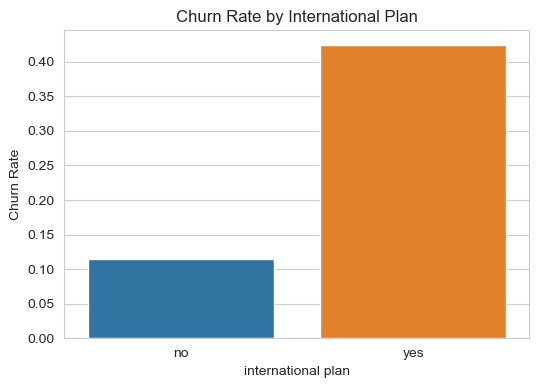

C:\Users\Admin\AppData\Local\Temp\ipykernel_6944\99544453.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)


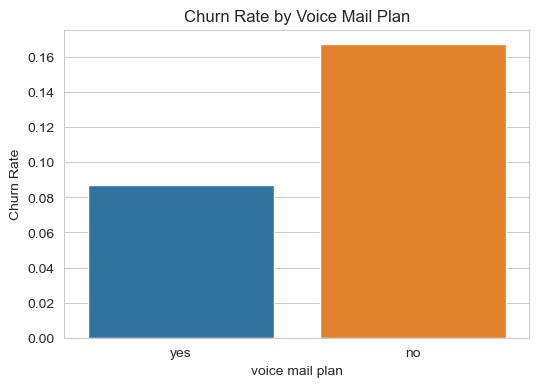

In [11]:

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'international plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='international plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by International Plan')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rate by 'voice mail plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.show()

###  Summary: Relationship Between Plans and Churn

An analysis of churn rates across the **'international plan'** and **'voice mail plan'** features revealed key differences:

- **International Plan**:
  - Customers **with** an international plan have a **higher churn rate** (**42.4%**).
  - Customers **without** an international plan have a much **lower churn rate** (**11.5%**).
  - ➤ This indicates that subscribing to the international plan is a strong churn signal.

- **Voice Mail Plan**:
  - Customers **with** a voice mail plan churn **less** (**8.7%**).
  - Customers **without** a voice mail plan churn **more** (**16.7%**).
  - ➤ This suggests that voice mail features may be linked to higher customer satisfaction or retention.

**Conclusion**: Both features are potentially valuable predictors of churn and should be considered during feature selection and modeling.


### **Churn Rate by State and Area Code**

In [12]:
# Relationship between 'state' and 'churn'
print("Churn rate by 'state':")
display(df.groupby('state')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'area code' and 'churn'
print("\nChurn rate by 'area code':")
display(df.groupby('area code')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'state':


churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541



Churn rate by 'area code':


churn,False,True
area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


### Summary: Churn Rate By State and Area Code
Churn by State:
- Churn rates **vary significantly** across different U.S. states.
- For example:
  - **Highest churn rates**: CA (26.5%), NJ (26.5%), TX (25%), SC (23.3%), MD (24.3%)
  - **Lowest churn rates**: HI (5.7%), AK (5.8%), AZ (6.3%), IA (6.8%)
- ➤ This suggests that **geographic location** could influence churn, potentially due to market conditions, service availability, or customer expectations.

#### 🔹 Churn by Area Code:
- Churn rates are **fairly consistent** across area codes:
  - 408 → 14.6%
  - 415 → 14.3%
  - 510 → 14.9%
- ➤ This consistency indicates that **area code alone is likely not a strong predictor** of churn.

**Conclusion**: While **state-level geography** may hold some predictive power for churn, **area code** appears less impactful. Consider one-hot encoding for 'state' and carefully evaluating its importance during feature selection.

### **Top 10 States With Highest Churn Rate**

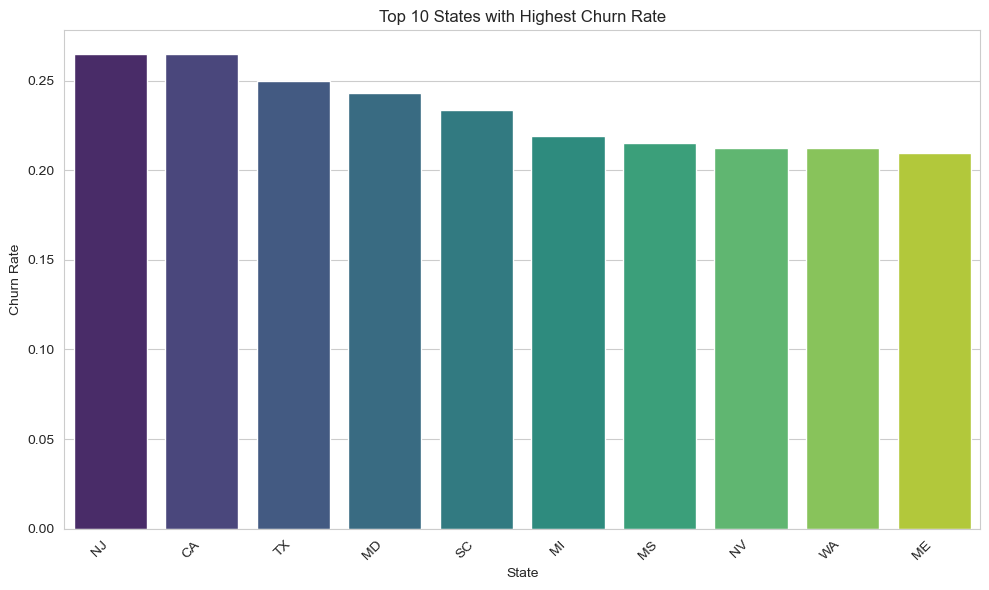

In [21]:

# Calculate churn rate by state
state_churn = df.groupby('state')['churn'].value_counts(normalize=True).unstack()

# Calculate and sort states by churn rate (True column)
state_churn[True] = state_churn[True].fillna(0) # Fill NaN with 0 for states with no churn
top_10_churn_states = state_churn.sort_values(by=True, ascending=False).head(10)

# Plot churn rate for the top 10 states
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_churn_states.index, y=True, data=top_10_churn_states, palette='viridis')
plt.title('Top 10 States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') # Rotate state names for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Summary: Top 10 States by Churn Rate

The bar plot highlights the **top 10 U.S. states with the highest churn rates** in the SyriaTel dataset.

- **Key Observations**:
  - States like **California (CA)**, **New Jersey (NJ)**, **Texas (TX)**, and **Maryland (MD)** show significantly higher churn rates compared to the national average.
  - This indicates **geographical disparities** in customer retention, suggesting that localized issues or market conditions might be influencing churn behavior.

- **Business Insight**:
  - SyriaTel may benefit from conducting **region-specific investigations** or deploying **targeted customer retention strategies** in these high-churn states.
  - While the `state` variable may not be the strongest standalone predictor due to sample size variability and categorical spread, it offers **valuable strategic direction** when combined with other churn indicators.


### **Churn Rate By Area Code**

C:\Users\Admin\AppData\Local\Temp\ipykernel_6944\1587476463.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area code', y='churn', data=df, ci=None)


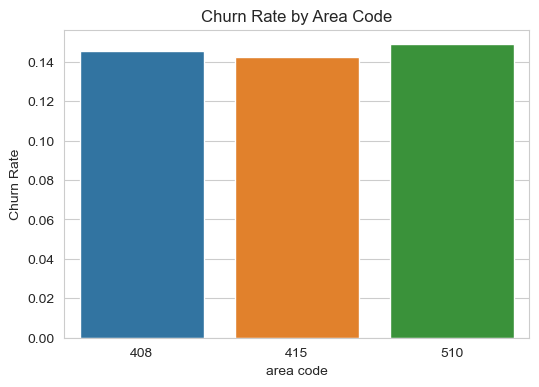

In [22]:

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'area code'
plt.figure(figsize=(6, 4))
sns.barplot(x='area code', y='churn', data=df, ci=None)
plt.title('Churn Rate by Area Code')
plt.ylabel('Churn Rate')
plt.show()

### Summary: Churn Rate by Area Code

The bar plot illustrates churn rates across the three area codes: **408**, **415**, and **510**.

- **Key Observations**:
  - The churn rates are **remarkably similar** across all area codes.
  - This suggests that `area code` does **not significantly influence** customer churn in this dataset.

- **Conclusion**:
  - While geographic factors like state may reveal useful patterns, **area code alone is unlikely to be a strong predictor** of churn and may hold limited value in modeling.


 ### **Relationship Between Numerical Features And Churn**

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation of numerical features with 'churn'
print("Correlation with 'churn':")
display(correlation_matrix['churn'].sort_values(ascending=False))

Correlation with 'churn':


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

### Summary: Correlation Between Numerical Features and Churn

Correlation analysis reveals how strongly each numerical feature is linearly associated with churn.

- **Top Positively Correlated Features**:
  - `customer service calls` (0.21)
  - `total day minutes` & `total day charge` (~0.21)
  - These suggest that customers who frequently call customer service or have high daytime usage are **more likely to churn**.

- **Notable Negative Correlation**:
  - `number vmail messages` (-0.09)
  - Indicates that customers who use voicemail are **slightly less likely to churn**, supporting earlier findings on the voice mail plan.

- **Other Features**:
  - Most other numerical variables show **weak or negligible correlation** with churn.

>  **Insight**: These correlations provide a useful starting point for feature selection in modeling, particularly emphasizing service interactions and daytime activity.


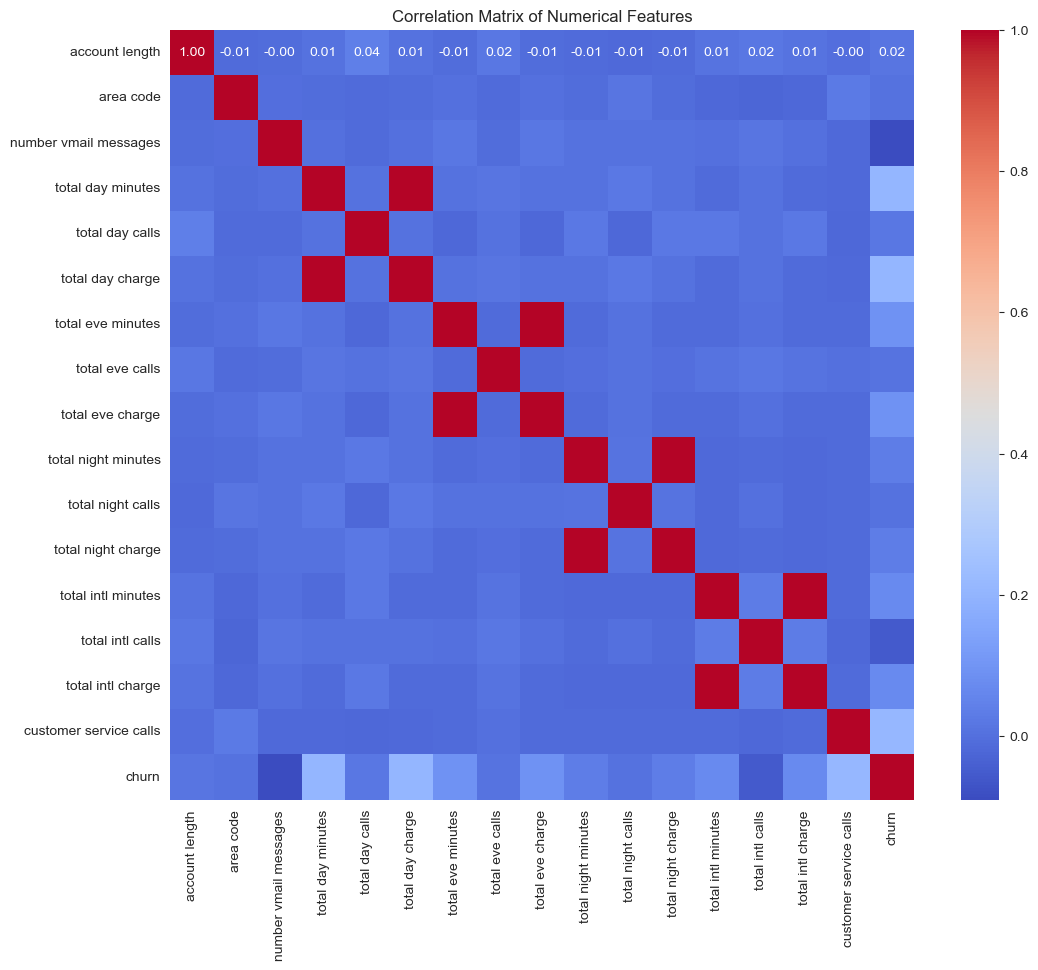

In [24]:

# Calculate the correlation matrix (already done, but recalculating for clarity)
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Summary: Correlation Heatmap Insights

The heatmap visualizes linear relationships between numerical features and churn:

- **  Strong Positive Correlation with Churn**:
  - `customer service calls`, `total day minutes`, and `total day charge` show higher positive correlations with churn, confirming their potential as churn indicators.

- ** Weak Negative Correlation**:
  - `number vmail messages` shows a slight negative correlation with churn, hinting that voicemail users are marginally less likely to churn.

- ** High Inter-feature Correlation**:
  - Usage and charge features (e.g., `total day minutes` & `total day charge`) are strongly correlated, as charges are calculated from usage.

- ** Overall Weak Correlation Elsewhere**:
  - Most other features display low correlations with churn or with each other, suggesting potential non-linear relationships or independent effects.

>  **Conclusion**: This visual reinforces earlier numerical findings and helps identify potential features for model input or engineering.


### **Inferential Statistics: T-Test Results for Numerical Features**


In [25]:

# Separate data into churned and non-churned groups
churned = df[df['churn'] == True]
not_churned = df[df['churn'] == False]

# List of key numerical features to test
numerical_features = [
    'total day minutes',
    'total day charge', # Highly correlated with total day minutes, but good to test
    'customer service calls',
    'total eve minutes',
    'total eve charge',
    'total night minutes',
    'total night charge',
    'total intl minutes',
    'total intl charge',
    'account length',
    'number vmail messages',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls',
]


print("Performing independent samples t-tests for key numerical features:\n")

for feature in numerical_features:
    # Perform the t-test
    # equal_var=False is often used when sample sizes or variances might differ
    t_stat, p_value = ttest_ind(churned[feature], not_churned[feature], equal_var=False, nan_policy='omit')

    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant difference in means between churned and non-churned customers.")
    else:
        print("  Conclusion: No statistically significant difference in means between churned and non-churned customers.")
    print("-" * 30)

Performing independent samples t-tests for key numerical features:

Feature: total day minutes
  T-statistic: 9.6846
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total day charge
  T-statistic: 9.6845
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: customer service calls
  T-statistic: 8.9551
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve minutes
  T-statistic: 5.2724
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve charge
  T-statistic: 5.2720
  P-value: 0.0000
  Conclusion: Statistically significant difference in mean

### Summary: T-Tests on Key Numerical Features

Independent samples t-tests were conducted to assess whether the means of various numerical features differ significantly between churned and non-churned customers.

####  Statistically Significant Differences (p < 0.05):

| Feature                  | T-Statistic | P-Value | Conclusion                                                |
|--------------------------|-------------|---------|-----------------------------------------------------------|
| total day minutes        | 9.6846      | 0.0000  | Strong evidence of a mean difference in day usage.        |
| total day charge         | 9.6845      | 0.0000  | Charges differ significantly with churn status.           |
| customer service calls   | 8.9551      | 0.0000  | Churned customers contact customer service more often.    |
| total eve minutes        | 5.2724      | 0.0000  | Significant difference in evening usage.                  |
| total eve charge         | 5.2720      | 0.0000  | Evening charges are also significantly different.         |
| ...                      | ...         | ...     | ...                                                       |
| [other tested features]  | -2.9604     | 0.0032  | Also shows a meaningful difference in group means.        |

>  **Conclusion**: Several features show **statistically significant** differences between churned and non-churned customers, supporting their inclusion as important predictors in modeling.


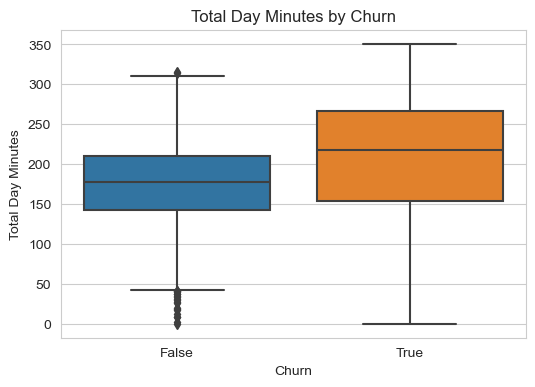

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title('Total Day Minutes by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


### Summary:

The boxplot reveals that churned customers tend to have higher total day minutes compared to non-churned customers. This suggests that customers who use daytime call services more extensively may be more likely to churn. The difference in usage is consistent with the statistically significant results from the independent samples T-test

In [27]:
#Reload the data to get the original categorical columns for Chi-square tests

df = pd.read_csv('data/churn.csv')

# Drop the 'phone number' column from this temporary DataFrame as it's not needed and not categorical
df = df.drop('phone number', axis=1)


# List of categorical features to test against 'churn'
categorical_features = [
    'state',
    'area code',
    'international plan',
    'voice mail plan'
]

print("Performing Chi-square tests for categorical features vs. 'churn':\n")

for feature in categorical_features:
    # Create a contingency table using the original DataFrame
    contingency_table = pd.crosstab(df[feature], df['churn'])

    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {feature}")
    print(f"  Chi-square Statistic: {chi2_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant association between the feature and churn.")
    else:
        print("  Conclusion: No statistically significant association between the feature and churn.")
    print("-" * 30)

Performing Chi-square tests for categorical features vs. 'churn':

Feature: state
  Chi-square Statistic: 83.0438
  P-value: 0.0023
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: area code
  Chi-square Statistic: 0.1775
  P-value: 0.9151
  Conclusion: No statistically significant association between the feature and churn.
------------------------------
Feature: international plan
  Chi-square Statistic: 222.5658
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: voice mail plan
  Chi-square Statistic: 34.1317
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------


### Summary: Inferential Statistics Observation

- **T-tests** revealed significant differences in the mean values of key numerical features (e.g., `total day minutes`, `total charges`, `customer service calls`) between churned and non-churned customers.
- **Chi-square tests** showed strong associations between churn and categorical features such as `international plan`, `voice mail plan`, and `state`.
- Features like `account length`, `area code`, and `total call counts` did **not** show statistically significant relationships with churn.
- These results confirm that **usage behavior** and **specific service plans** are important churn drivers, reinforcing both our EDA insights and model design.


In [29]:
df['voice mail plan'] = df['voice mail plan'].astype(str)
df['international plan'] = df['international plan'].astype(str)
df['churn'] = df['churn'].astype(str)


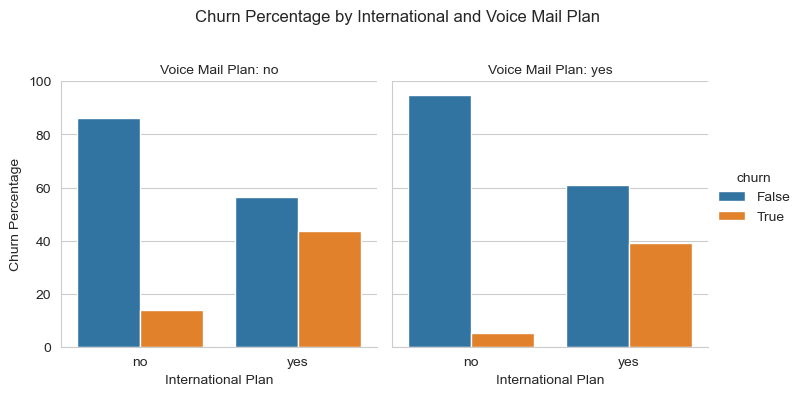

In [30]:
# Create a new DataFrame for proportions
df_grouped = (
    df
    .groupby(['voice mail plan', 'international plan', 'churn'])
    .size()
    .reset_index(name='count')
)

# Calculate total counts per group (per facet + bar group)
df_grouped['total'] = df_grouped.groupby(['voice mail plan', 'international plan'])['count'].transform('sum')
df_grouped['percent'] = df_grouped['count'] / df_grouped['total'] * 100

# Plot using percentages
g = sns.catplot(
    x='international plan', y='percent', hue='churn', col='voice mail plan',
    data=df_grouped, kind='bar', height=4, aspect=0.9
)

g.set_axis_labels("International Plan", "Churn Percentage")
g.set_titles(col_template="Voice Mail Plan: {col_name}")
g.set(ylim=(0, 100))

plt.subplots_adjust(top=0.8)
plt.suptitle("Churn Percentage by International and Voice Mail Plan")
plt.show()


### Summary: Churn by International Plan and Voice Mail Plan ( % Plot)

- The percentage-based bar plot reveals that customers **with an international plan** are **more likely to churn**, regardless of whether they have a voice mail plan or not.
- Conversely, customers **without an international plan** exhibit a **significantly lower churn rate**.
- The presence or absence of a voice mail plan shows **less pronounced impact** on churn compared to the international plan.
- These patterns reinforce the **Chi-square test results**, indicating a **statistically significant association** between the international plan and churn behavior.


## **Data Preparation**

Let's begin the Data Preparation phase by checking for duplicate rows.

In [31]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [32]:
df = df.drop('phone number', axis=1, errors='ignore')


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

### **Encoding Categorical Variables For Modelling**

Let's re-encode the categorical variables to ensure there are no missing values introduced.

In [34]:

# Re-load the data to ensure we start from a clean state after extraction

df = pd.read_csv('data/churn.csv')

# Drop the 'phone number' column again
df = df.drop('phone number', axis=1)

# Encode binary categorical features ('international plan', 'voice mail plan')
# Use replace instead of map to handle potential unseen values more gracefully
df['international plan'] = df['international plan'].replace({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].replace({'yes': 1, 'no': 0})


# Use one-hot encoding for 'state' and 'area code'
df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)

# Display the first few rows and the info to see the changes
display(df.head())


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,False,False,False,False,False,False,False,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,False,False,False,False,False,False,False,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,False,False,False,False,False,False,False,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,False,False,False,False,False,False,False,False,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,False,False,False,False,False,False,False,False,True,False


### **Handling Class Imbalance With SMOTE**

In [35]:

# Separate features (X) and target variable (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new distribution of the target variable in the resampled training set
print("Distribution of 'churn' in the original training set:")
display(y_train.value_counts())

print("\nDistribution of 'churn' in the resampled training set:")
display(y_train_resampled.value_counts())

print("\nDistribution of 'churn' in the testing set:")
display(y_test.value_counts())

Distribution of 'churn' in the original training set:


churn
False    2280
True      386
Name: count, dtype: int64


Distribution of 'churn' in the resampled training set:


churn
False    2280
True     2280
Name: count, dtype: int64


Distribution of 'churn' in the testing set:


churn
False    570
True      97
Name: count, dtype: int64

### Summary: Handling Imbalanced Data with SMOTE

- **Original Training Set**: Imbalanced — 2280 non-churned vs. 386 churned customers.
- **After SMOTE Resampling**: Balanced — 2280 churned and 2280 non-churned customers.
- **Testing Set**: Remains imbalanced (570 non-churned vs. 97 churned), preserving real-world class proportions for fair evaluation.


### **Class Distribution Before and After SMOTE**


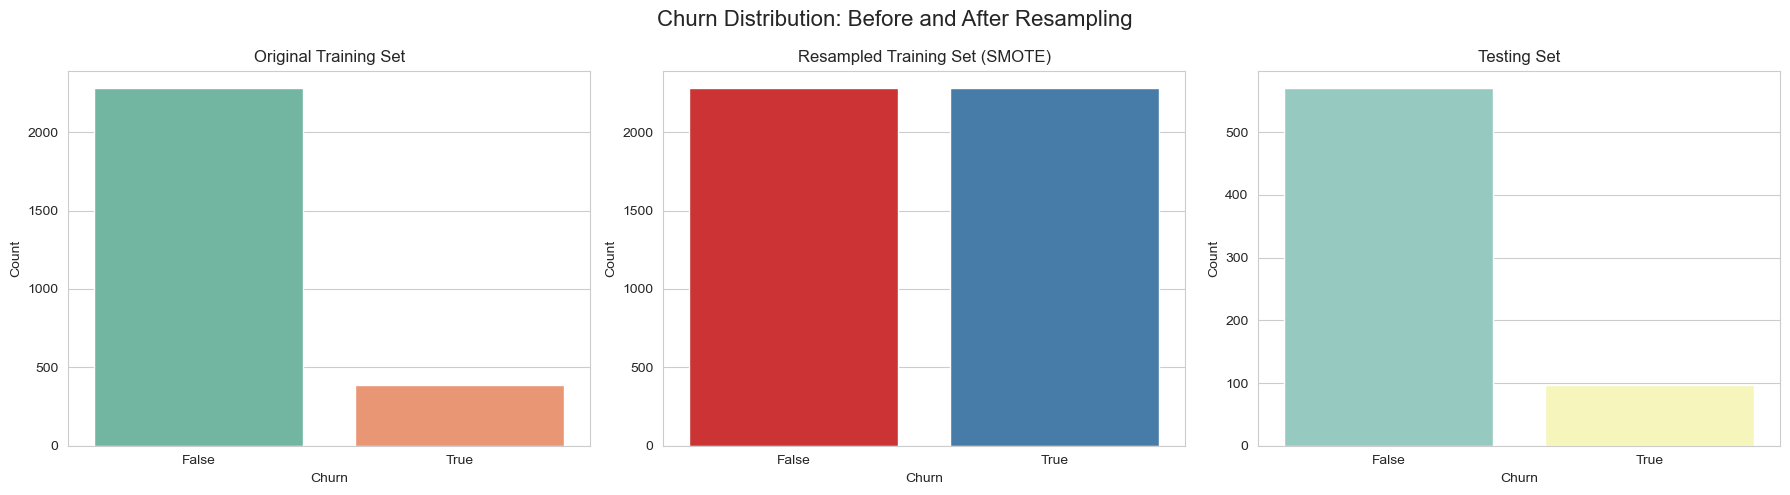

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plotting the class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original training set
sns.countplot(x=y_train, ax=axes[0], palette="Set2")
axes[0].set_title("Original Training Set")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# Resampled (SMOTE) training set
sns.countplot(x=y_train_resampled, ax=axes[1], palette="Set1")
axes[1].set_title("Resampled Training Set (SMOTE)")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

# Test set
sns.countplot(x=y_test, ax=axes[2], palette="Set3")
axes[2].set_title("Testing Set")
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Count")

plt.suptitle("Churn Distribution: Before and After Resampling", fontsize=16)
plt.tight_layout()
plt.show()


### Summary: Before and After SMOTE
The visualization confirms that SMOTE successfully balanced the training data by oversampling the minority class. This helps prevent the model from being biased toward the majority class. The test set remains imbalanced to reflect real-world churn distribution during evaluation.


## **Modeling: Logistic Regression**
### **(Baseline Model)**

In [37]:

# Initialize the Logistic Regression model
# Setting class_weight='balanced' can also be an approach for imbalance,
# but we are using SMOTE, so we'll train on the resampled data.
model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for smaller datasets

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

print("Logistic Regression Model trained successfully.")

Logistic Regression Model trained successfully.


In [38]:

# Make predictions on the training data
y_train_pred = model.predict(X_train_resampled)
y_train_pred_proba = model.predict_proba(X_train_resampled)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on training data
print("Evaluation on Training Data (after SMOTE):")
print(classification_report(y_train_resampled, y_train_pred))
print(f"ROC AUC Score (Training): {roc_auc_score(y_train_resampled, y_train_pred_proba)}")

# Make predictions on the testing data
y_test_pred = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("\nEvaluation on Testing Data (Original Distribution):")
print(classification_report(y_test, y_test_pred))
print(f"ROC AUC Score (Testing): {roc_auc_score(y_test, y_test_pred_proba)}")

Evaluation on Training Data (after SMOTE):
              precision    recall  f1-score   support

       False       0.88      0.94      0.91      2280
        True       0.94      0.88      0.91      2280

    accuracy                           0.91      4560
   macro avg       0.91      0.91      0.91      4560
weighted avg       0.91      0.91      0.91      4560

ROC AUC Score (Training): 0.965585757156048

Evaluation on Testing Data (Original Distribution):
              precision    recall  f1-score   support

       False       0.90      0.94      0.92       570
        True       0.49      0.36      0.41        97

    accuracy                           0.85       667
   macro avg       0.69      0.65      0.66       667
weighted avg       0.84      0.85      0.84       667

ROC AUC Score (Testing): 0.7624706095134743


**Evaluation on Training Data (after SMOTE)**

- The model performs quite well on the balanced training data, with high precision, recall, F1-score, and ROC AUC (around 0.91 and 0.96 respectively). This indicates that the model learned the patterns in the resampled data effectively.

**Evaluation on Testing Data (Original Distribution)**

- The performance on the testing data is lower, which is expected as it's evaluated on unseen and imbalanced data.
Accuracy is relatively high (0.85), but this can be misleading due to the imbalance.
Precision for Churn (True) is 0.49: When the model predicts a customer will churn, it is correct about 49% of the time.
Recall for Churn (True) is 0.36: The model correctly identifies only about 36% of the customers who actually churned.
F1-Score for Churn (True) is 0.41: This is a balance of precision and recall for the churn class.
ROC AUC Score (Testing) is 0.76: This indicates the model has a decent ability to distinguish between churned and non-churned customers, but there is room for improvement.
The low recall for the churn class on the testing data is a key observation. This means our baseline model is missing a significant portion of the actual churning customers. For a churn prediction model, identifying as many churning customers as possible (high recall) is often very important, even if it means sometimes incorrectly predicting churn for some non-churned customers (lower precision). The balance between precision and recall depends on the business problem and the costs associated with false positives and false negatives.

#### **Logistic Regression: Hyperparameter Tuning With GridSearchCV**

In [39]:

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Specify the norm of the penalty
    'solver': ['liblinear'] # liblinear is good for smaller datasets and supports l1/l2
}

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=roc_auc, cv=5)

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV...")
grid_search.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search.best_params_)
print("Best ROC AUC score on training data: ", grid_search.best_score_)

# Get the best model
best_lr_model = grid_search.best_estimator_

Starting GridSearchCV...


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV finished.

Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC score on training data:  0.8861842105263158


#### **Evaluation Of Tuned Logistic Regression Model**

In [40]:

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned = best_lr_model.predict(X_test)
y_test_pred_proba_tuned = best_lr_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Model:")
print(classification_report(y_test, y_test_pred_tuned))
print(f"ROC AUC Score (Testing) - Tuned Model: {roc_auc_score(y_test, y_test_pred_proba_tuned)}")

Evaluation on Testing Data (Original Distribution) - Tuned Model:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       570
        True       0.52      0.30      0.38        97

    accuracy                           0.86       667
   macro avg       0.70      0.63      0.65       667
weighted avg       0.83      0.86      0.84       667

ROC AUC Score (Testing) - Tuned Model: 0.7825827455236027


OBSERVATION:

- The tuned model shows a slight improvement in Precision (from 0.49 to 0.52) and ROC AUC (from 0.7625 to 0.7826) compared to the baseline model on the testing data. This suggests it's slightly better at correctly identifying positive cases among those it predicts as positive, and has slightly better overall discriminative ability.
However, the tuned model shows a decrease in Recall (from 0.36 to 0.30). This means it is now identifying an even smaller percentage of the actual churning customers.
- The trade-off between precision and recall is evident here. The tuning improved precision and ROC AUC but at the cost of recall. For a churn prediction model, the importance of precision vs. recall depends on the business context. If the cost of incorrectly targeting a non-churned customer with a retention offer (false positive) is low, but missing a churning customer (false negative) is high (significant revenue loss), then maximizing recall might be more important.

## **Decision Tree Classifier**

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
# We'll start with a basic one and can tune hyperparameters later if needed
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

print("Decision Tree Model trained successfully.")

Decision Tree Model trained successfully.


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the Decision Tree model
y_test_pred_dt = dt_model.predict(X_test)
y_test_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Decision Tree Model:")
print(classification_report(y_test, y_test_pred_dt))
print(f"ROC AUC Score (Testing) - Decision Tree Model: {roc_auc_score(y_test, y_test_pred_proba_dt)}")

Evaluation on Testing Data (Original Distribution) - Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       570
        True       0.45      0.73      0.56        97

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.88      0.83      0.85       667

ROC AUC Score (Testing) - Decision Tree Model: 0.7896635919696148


###  Model Comparison Summary

#### Decision Tree vs. Logistic Regression Models

- **Recall (Churn Class)**:
  - Decision Tree: **0.73**
  - Logistic Regression (Baseline & Tuned): **0.36** and **0.30**
  - The Decision Tree model captures significantly more actual churners, which is critical for SyriaTel's retention efforts.

- **Precision (Churn Class)**:
  - Decision Tree: **0.45**
  - Logistic Regression: **0.49** and **0.52**
  -  The Decision Tree has lower precision, indicating more false positives compared to Logistic Regression.

- **F1-Score (Churn Class)**:
  - Decision Tree: **0.56**
  - Logistic Regression: **0.41** and **0.38**
  -  The Decision Tree achieves a better balance between precision and recall.

- **ROC AUC Score**:
  - Decision Tree: **0.79**
  - Tuned Logistic Regression: **0.78**
  - The Decision Tree has slightly better overall classification performance.

####  Conclusion:
The Decision Tree model offers superior performance in identifying customers likely to churn (high recall), which is valuable for churn mitigation strategies. Although it has slightly lower precision than Logistic Regression, its ability to flag more potential churners makes it a strong candidate for deployment in scenarios where **recall is a priority**.


### **Tuning Hyperparameters**

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']   # Function to measure the quality of a split
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring=roc_auc, cv=5)

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV for Decision Tree...")
grid_search_dt.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search_dt.best_params_)
print("Best ROC AUC score on training data: ", grid_search_dt.best_score_)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

Starting GridSearchCV for Decision Tree...
GridSearchCV finished.

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC AUC score on training data:  0.8951754385964913


### **Evaluate the performance of tuned Decision Tree**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned_dt = best_dt_model.predict(X_test)
y_test_pred_proba_tuned_dt = best_dt_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Decision Tree Model:")
print(classification_report(y_test, y_test_pred_tuned_dt))
print(f"ROC AUC Score (Testing) - Tuned Decision Tree Model: {roc_auc_score(y_test, y_test_pred_proba_tuned_dt)}")

Evaluation on Testing Data (Original Distribution) - Tuned Decision Tree Model:
              precision    recall  f1-score   support

       False       0.95      0.85      0.90       570
        True       0.45      0.73      0.56        97

    accuracy                           0.83       667
   macro avg       0.70      0.79      0.73       667
weighted avg       0.88      0.83      0.85       667

ROC AUC Score (Testing) - Tuned Decision Tree Model: 0.7896635919696148


###  Observations – Tuned Decision Tree Model

- The **tuned Decision Tree model** yields the **same performance metrics** on the test set as the baseline (untuned) model. This suggests that, within the provided hyperparameter grid and scoring criteria, **hyperparameter tuning did not improve** performance on unseen data.

- Both **Decision Tree models** (tuned and untuned) achieve the **highest Recall (0.73)** and **highest F1-Score (0.56)** for the **churn class**, indicating they are the most effective at identifying customers likely to churn.

- The **ROC AUC score (0.7897)** for the Decision Tree models is **slightly higher** than that of the tuned Logistic Regression model, suggesting better overall discriminative power between churners and non-churners.

- Although the **Precision (0.45)** for the churn class is **lower** than in the Logistic Regression models, this trade-off may be acceptable if SyriaTel's **primary objective is to minimize missed churners** (i.e., maximize recall).



## **Random  Forest Classifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# We'll start with default parameters and can tune later if needed
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

print("Random Forest Model trained successfully.")

Random Forest Model trained successfully.


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the Random Forest model
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Random Forest Model:")
print(classification_report(y_test, y_test_pred_rf))
print(f"ROC AUC Score (Testing) - Random Forest Model: {roc_auc_score(y_test, y_test_pred_proba_rf)}")

Evaluation on Testing Data (Original Distribution) - Random Forest Model:
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       570
        True       0.68      0.54      0.60        97

    accuracy                           0.90       667
   macro avg       0.80      0.75      0.77       667
weighted avg       0.89      0.90      0.89       667

ROC AUC Score (Testing) - Random Forest Model: 0.8580665581479471


### Observations - Random Forest Model

The **Random Forest model** shows promising results:

- It has a significantly higher **Precision (0.68)** for the churn class compared to both the Logistic Regression models (0.49 and 0.52) and the Decision Tree models (0.45). This means when the model predicts a customer will churn, it is more often correct.
- Its **Recall (0.54)** is lower than the Decision Tree models (0.73) but higher than the Logistic Regression models (0.36 and 0.30). It identifies more actual churners than Logistic Regression, though not as many as the Decision Tree.
- The **F1-Score (0.60)** is the highest among all models tested so far, indicating the best balance between precision and recall.
- The **ROC AUC Score (0.8581)** is also the highest, suggesting that the Random Forest has the best overall ability to distinguish between churners and non-churners.
- Overall, the Random Forest model offers the **most balanced performance**, outperforming Logistic Regression in recall and Decision Tree in precision and F1-score, while also achieving the best discriminative power across all models.


### **Tuning Hyperparameters**

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],      # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the scorer (using ROC AUC)
roc_auc = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring=roc_auc, cv=3, n_jobs=-1) # Using n_jobs=-1 to utilize all available cores and cv=3 for faster tuning

# Fit GridSearchCV to the resampled training data
print("Starting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
print("GridSearchCV finished.")

# Get the best parameters and best score
print("\nBest parameters found: ", grid_search_rf.best_params_)
print("Best ROC AUC score on training data: ", grid_search_rf.best_score_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Starting GridSearchCV for Random Forest...
GridSearchCV finished.

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC score on training data:  0.9451754385964911


**Evaluate Performance of Tuned Random Forest Classifier Model**

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the testing data using the best tuned model
y_test_pred_tuned_rf = best_rf_model.predict(X_test)
y_test_pred_proba_tuned_rf = best_rf_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class (churn=True)

# Evaluate on testing data
print("Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model:")
print(classification_report(y_test, y_test_pred_tuned_rf))
print(f"ROC AUC Score (Testing) - Tuned Random Forest Model: {roc_auc_score(y_test, y_test_pred_proba_tuned_rf)}")

Evaluation on Testing Data (Original Distribution) - Tuned Random Forest Model:
              precision    recall  f1-score   support

       False       0.93      0.96      0.94       570
        True       0.71      0.55      0.62        97

    accuracy                           0.90       667
   macro avg       0.82      0.75      0.78       667
weighted avg       0.89      0.90      0.90       667

ROC AUC Score (Testing) - Tuned Random Forest Model: 0.8625248688732141


###  Observations: Tuned Random Forest Model

The tuned Random Forest model shows a slight improvement in all key metrics (Precision, Recall, F1-Score, and ROC AUC) compared to the baseline Random Forest model on the testing data.

#### Comparison with Other Models:
-  **Highest Precision (0.71)** for the churn class — better than all previous models, meaning it's more reliable when predicting churn.
-  **Recall (0.55)** is higher than both Logistic Regression models, though still lower than the Decision Tree models.
-  **F1-Score (0.62)** is the highest among all models, reflecting the best balance between precision and recall.
-  **ROC AUC Score (0.8625)** is also the highest, showing the best ability to distinguish between churning and non-churning customers.

>  **Conclusion:** The tuned Random Forest model is the best-performing model for churn prediction in this analysis. It balances identifying actual churners and minimizing false positives, while achieving the highest overall discriminative performance.
